In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df_housing = pd.read_csv("Housing.csv")
 
# Printing top 5 rows
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# EXPLORATORY DATA ANALYSIS

# 1. Description of sample and features

In [3]:
number_rows, number_columns = df_housing.shape

#printing totals rows and columns
print(f'Total rows: {number_rows}')
print(f'Total column: {number_columns}')

Total rows: 545
Total column: 13


In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#Statistics summary of the data
df_housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
#Checking for duplicates in our data
data = df_housing.drop_duplicates(subset ="furnishingstatus",)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


In [7]:
#Checking for unique values 
df_housing.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [8]:
#Is our data balanced?
df_housing.value_counts("furnishingstatus")

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

# 2. Checking for missing data¶

In [9]:
#Checking for null values
df_housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

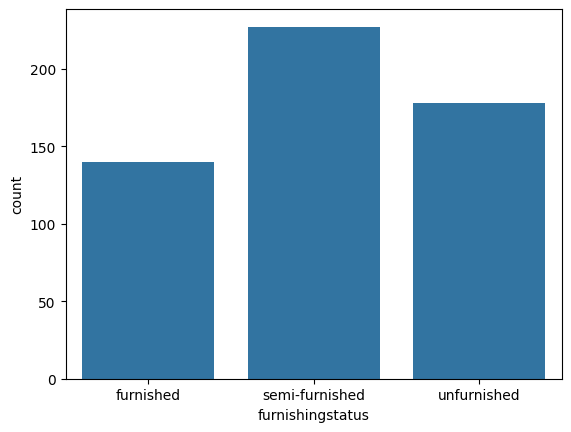

In [10]:
#Countplot for visualization

sns.countplot(x='furnishingstatus', data=df_housing, )
plt.show()


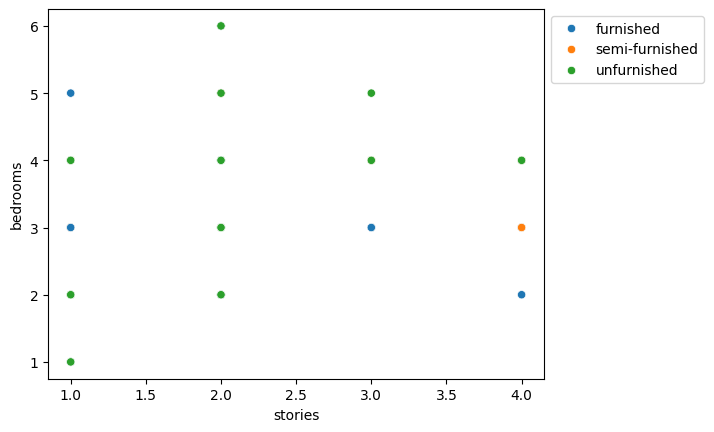

In [11]:
#Relation between variables Stories and number of bedrooms
sns.scatterplot(x='stories', y='bedrooms',
                hue='furnishingstatus', data=df_housing)


# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

From here, we can understand that houses are built upto 4 stories, where

1 story house has maximum 5 bedrooms, are furnished houses.

2 stories houses are all unfurnished, and have maximum of 6 bedrooms.

3 stories houses have maximum of 5 bedrooms and are mostly unfurnished.

4 stories houses have maximum of 4 bedrooms which are unfurnished.

Unfurnished houses avaibale in all 4 stories of house options, and have maximum number of bedrooms. Semi-furnished houses are available only in 4 stories houses and have can have 3 bedrooms

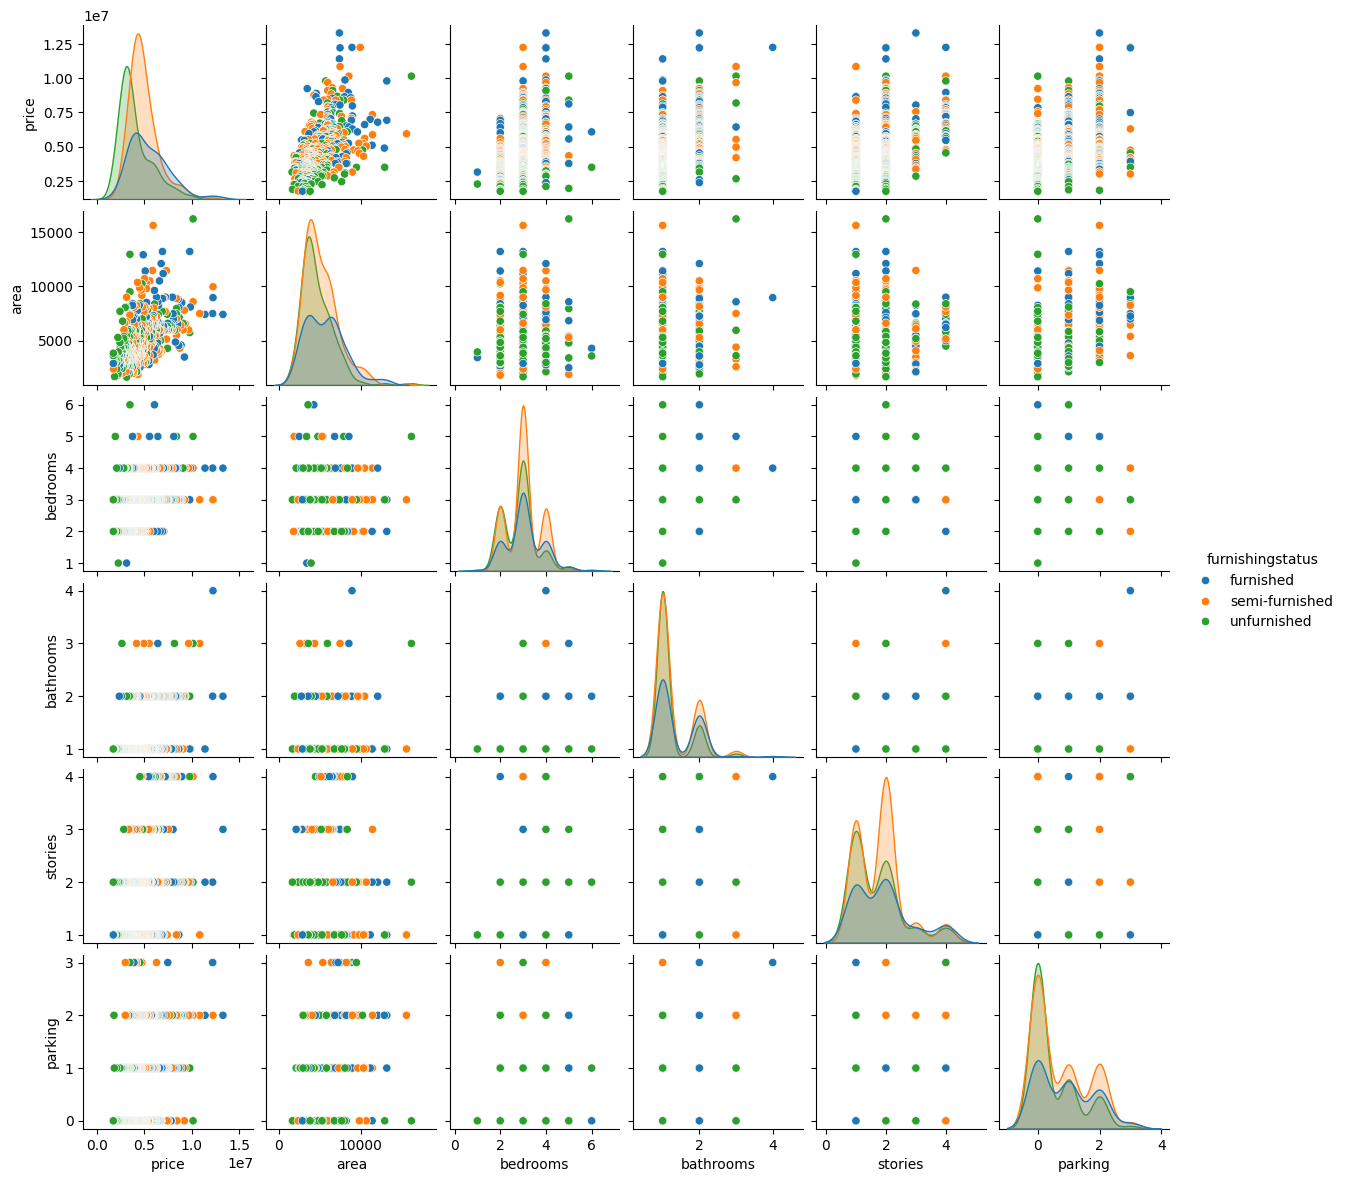

<Figure size 640x480 with 0 Axes>

In [12]:
#compare all the variables
sns.pairplot(df_housing,hue='furnishingstatus', height=2)

plt.show()
plt.tight_layout()

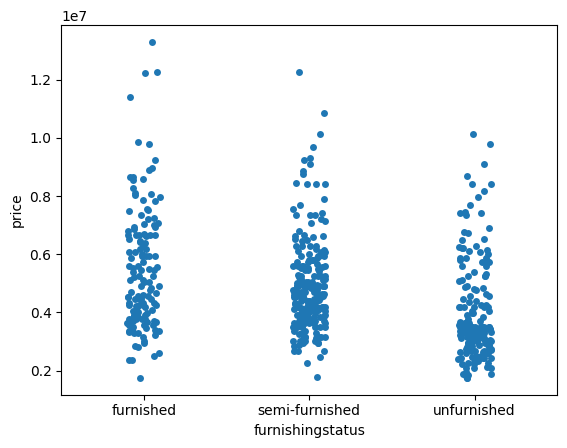

In [13]:
sns.stripplot(y ='price', x = 'furnishingstatus', data = df_housing)
plt.show()

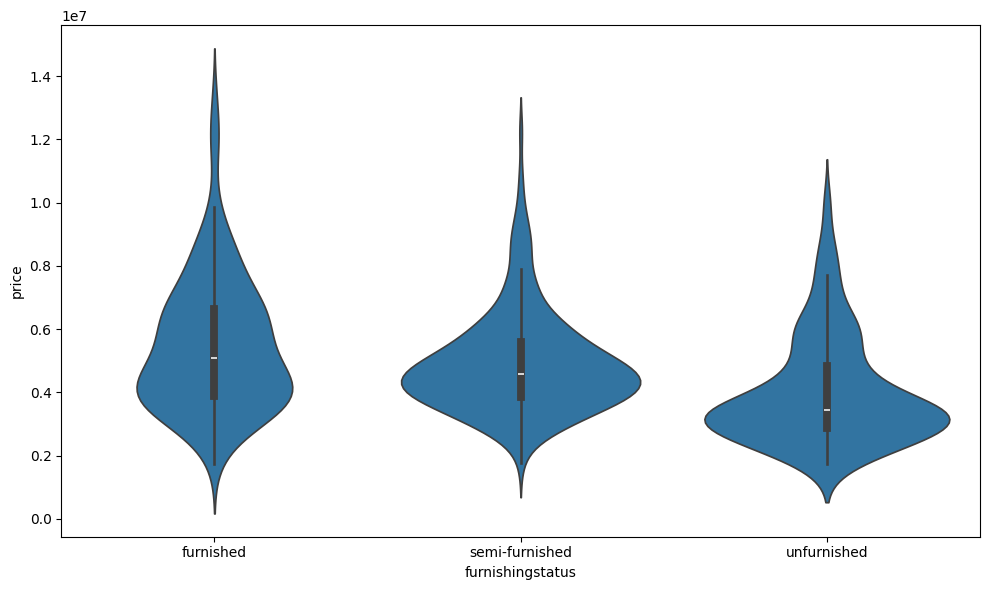

In [14]:
plt.figure(figsize=(10, 6))

sns.violinplot(x="furnishingstatus", y="price", data=df_housing)
plt.tight_layout()
plt.show()

# 4. Correlation

In [15]:
import numpy as np

#selecting only the numeric data types for correlation
data.select_dtypes(include=[np.number]).corr(method='pearson')

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,-0.998822,-6.546537e-01,-0.944911,7.559289e-01,0.944911
area,-0.998822,1.000000,6.905607e-01,0.959680,-7.232744e-01,-0.959680
bedrooms,-0.654654,0.690561,1.000000e+00,0.866025,-1.922963e-16,-0.866025
bathrooms,-0.944911,0.959680,8.660254e-01,1.000000,-5.000000e-01,-1.000000
stories,0.755929,-0.723274,-1.922963e-16,-0.500000,1.000000e+00,0.500000
parking,0.944911,-0.959680,-8.660254e-01,-1.000000,5.000000e-01,1.000000


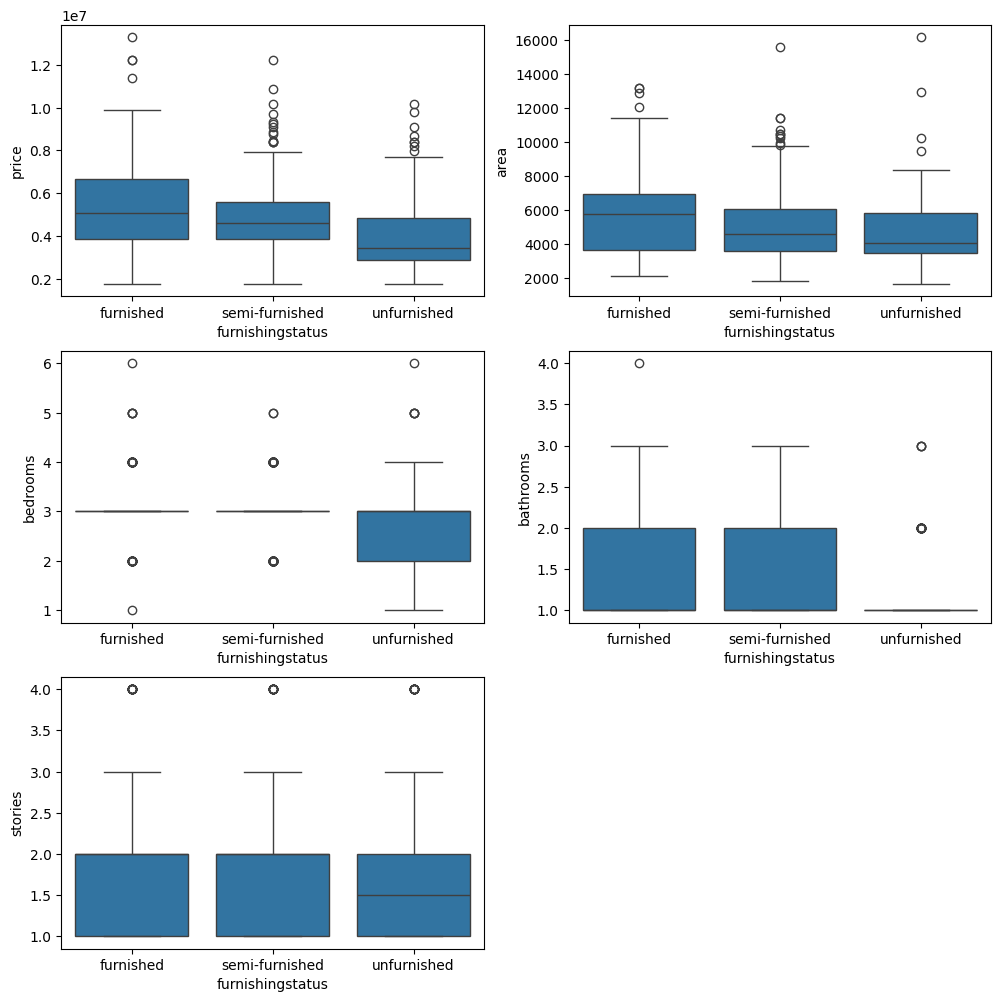

In [16]:
#Boxplot for each column comparing all species
def graph(y):
    sns.boxplot(x="furnishingstatus", y=y, data=df_housing)
 
plt.figure(figsize=(12,12))
     
# Adding the subplot at the specified
# grid position making 3 rows and 2 columns
plt.subplot(321)
graph('price')

plt.subplot(322)
graph('area')

plt.subplot(323)
graph('bedrooms')

plt.subplot(324)
graph('bathrooms')
 
plt.subplot(325)
graph('stories')
 

plt.show()



# Multi-Linear Regression

In [17]:
# Columns to map from 'yes'/'no' to 1/0
columns_to_map = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Applying the mapping to each column
for col in columns_to_map:
    df_housing[col] = df_housing[col].map({'no': 0, 'yes': 1})

# Display the updated DataFrame
df_housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [18]:
data = df_housing.drop_duplicates(subset ="furnishingstatus",)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished


In [19]:
# Creating dummy variables for 'furnishingstatus'
df_housing = pd.get_dummies(df_housing, columns=['furnishingstatus'], drop_first=False)

# The resulting dataframe will have new columns: 'furnishingstatus_furnished', 
# 'furnishingstatus_semi-furnished', and 'furnishingstatus_unfurnished'
# where each will be a binary column indicating the furnishing status.

# Display the updated DataFrame to verify the new columns
df_housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [20]:
# Assuming df_housing has boolean columns that need to be converted to binary
boolean_columns = df_housing.select_dtypes(include=['bool']).columns

# Convert boolean columns to binary (1 for True, 0 for False)
df_housing[boolean_columns] = df_housing[boolean_columns].astype(int)

# Display the updated DataFrame to verify the changes
df_housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [21]:
import statsmodels.api as sm

# Define the independent variables, excluding 'furnishingstatus_unfurnished' to avoid multicollinearity
X = df_housing.drop(['price', 'furnishingstatus_unfurnished'], axis=1)
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df_housing['price']

# Create the model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          9.07e-123
Time:                        13:20:14   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Logistic Regression

In [22]:
df_housing['Value'] = df_housing['price'].apply(lambda x: 1 if x >= 5000000 else 0)
df_housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Value
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0,0


In [23]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Take the logarithm of the 'area' feature
df_housing['log_area'] = np.log(df_housing['area'])

# Define the features and target variable
X = df_housing[['log_area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 
                'basement', 'hotwaterheating', 'airconditioning', 'parking', 
                'prefarea', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished']]
y = df_housing['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Optionally, you can also print the coefficients if needed
print(logreg.coef_)


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       129
           1       0.79      0.79      0.79        89

    accuracy                           0.83       218
   macro avg       0.82      0.82      0.82       218
weighted avg       0.83      0.83      0.83       218

[[3.34934119 0.53076753 1.61934733 0.86670699 0.8384917  1.33274221
  0.84690865 0.84248972 0.81295688 0.22360781 1.35522824 0.30346067
  0.31065625]]


# ANOVA

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_housing['log_price'] = np.log(df_housing['price'])
# Group the data based on the presence or absence of facilities
grouped_data = df_housing.groupby(['airconditioning', 'hotwaterheating'])

# Perform ANOVA test
model = ols('log_price ~ C(airconditioning) + C(hotwaterheating)', data=df_housing).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)


                       sum_sq     df           F        PR(>F)
C(airconditioning)  16.695583    1.0  155.867454  1.284855e-31
C(hotwaterheating)   1.682191    1.0   15.704680  8.394876e-05
Residual            58.055775  542.0         NaN           NaN
